## Artificial Intelligence Assignment 2
## No8. Data Preprocessing
## 20132651 Sungjae Lee

In [1]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# torch 의 TensorDataset 과 DataLoader 를 추가로 import 합니다.

In [2]:
 class TwoLayerNet(torch.nn.Module):
        def __init__(self, D_in, H, D_out):
            super(TwoLayerNet, self).__init__()
            self.linear1 = torch.nn.Linear(D_in, H)
            self.linear2 = torch.nn.Linear(H, D_out)
            
        def forward(self, x):
            h_relu = self.linear1(x).clamp(min = 0)
            y_pred = self.linear2(h_relu)
            return y_pred
        
# 이전의 코드와 마찬가지로 Two Layer Net 클래스를 정의합니다.

In [3]:
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 위와 마찬가지로 신경망 구성을 설정합니다.

In [4]:
loader = DataLoader(TensorDataset(x, y), batch_size = 8)
model = TwoLayerNet(D_in, H, D_out)

# x 와 y 데이터셋을 바탕으로, DataLoader 를 사용하여 batch 를 분할합니다.

In [5]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)

# 이번에는 learning rate 를 더 작은 1e - 02 로 설정하고 진행합니다.
# optimizer 는 아까와 동일한 SGD 를 사용합니다.

In [6]:
loss_epoch_list = []
loss_sum = 0

for epoch in range(20):
    
    
    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = torch.nn.functional.mse_loss(y_pred, y_batch)
        
        print(epoch, loss.item())
        loss_list.append(loss.item())
        loss_sum += loss.item()
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    loss_epoch_list.append(loss_sum/8)
    loss_sum = 0
    
# 20번의 epoch 로 나누어 각 epoch 마다 8개의 batch 씩 총 160회 진행합니다.
# 각 epoch 의 loss 를 모두 더하여 loss_sum 에 저장, loss_epoch_list 에
# 해당 loss_sum 을 batch_size 로 나눈 값을 저장합니다.

0 0.8668628334999084
0 1.5398504734039307
0 1.1024609804153442
0 1.0690079927444458
0 0.9286471009254456
0 0.9428011775016785
0 1.1277846097946167
0 1.1067018508911133
1 0.7937982678413391
1 1.391047477722168
1 0.9917383193969727
1 0.9850044846534729
1 0.8438303470611572
1 0.8571638464927673
1 1.0061798095703125
1 0.9856839776039124
2 0.7320733666419983
2 1.266222596168518
2 0.9011216163635254
2 0.9118313193321228
2 0.7731723189353943
2 0.7854481339454651
2 0.9073835611343384
2 0.8848567008972168
3 0.6787490248680115
3 1.1601660251617432
3 0.8253541588783264
3 0.8478189706802368
3 0.7132809162139893
3 0.722895622253418
3 0.8246045112609863
3 0.8008801341056824
4 0.630899965763092
4 1.0692063570022583
4 0.7598689794540405
4 0.7914360761642456
4 0.6609030961990356
4 0.6675143837928772
4 0.7557369470596313
4 0.7285773754119873
5 0.5870456099510193
5 0.9911118149757385
5 0.7018150091171265
5 0.7414661645889282
5 0.6145423054695129
5 0.6183814406394958
5 0.6956366896629333
5 0.6661788225173

### (1) y_pred에 따른 loss (accuracy) 변화를 화면 출력 확인 (plot)

In [7]:
import matplotlib.pyplot as plt

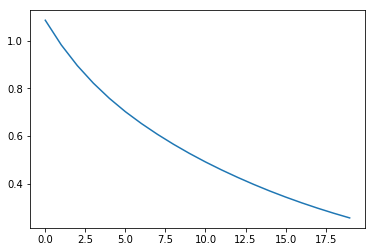

In [8]:
plt.plot(loss_epoch_list)
plt.show()

# 각 epoch 의 loss 평균에 대해 저장된 loss_epoch_list 의 그래프입니다.
# 이전까지의 학습 중에서 가장 수렵에 가까운 그래프 형태를 띄고 있습니다.

### (2) 앞 문제의 코드와 비교

In [9]:
# 앞의 코드와 차이점은 크게 두 가지로 나누어 볼 수 있습니다.
# 첫째는 learning rate 를 조금 더 작게 만들었다는 점과
# 둘째는 이전까지는 하지 않았던 batch 작업을 통해 학습을 진행하였다는 점 입니다.
# 그 결과 앞에서 나왔던 loss 에 비해 더 나은 값을 얻을 수 있었으며, 마침내
# loss 가 0에 가깝게 수렴하는 모습을 볼 수 있었습니다. 